In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Dataset .csv")
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


Level 1  Task1

Data Exploration and Preprocessing


In [5]:
df.shape

(9551, 21)

No. of rows = 9551

No.of columns = 21

Checking Missing Values

In [6]:
df = df.dropna()

In [7]:
df.shape

(9542, 21)

In [9]:
df.dtypes


,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
columns = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes']

In [12]:
for i in columns:
  print(i)
  print(df[i].unique())

Restaurant ID
[6317637 6304287 6300002 ... 5915807 5916112 5927402]
Restaurant Name
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]
Country Code
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
City
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Monroe' 'Montville' 'Ojo Caliente'
 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola' 'Phillip Island'
 'Po

In [13]:
binary_columns = ["Has Table booking", "Has Online delivery", "Is delivering now"]
df[binary_columns] = df[binary_columns].replace({"Yes": True, "No": False})

<ipython-input-13-8b53369c6b57>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({"Yes": True, "No": False})


In [14]:
df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [15]:
df['Aggregate rating'].value_counts()

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,495
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


Level 1  and  Task2

Descriptive Analysis

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
# Removing outliers
df = df[df['Aggregate rating'] !=0]

In [18]:
df.shape

(7394, 21)

In [19]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),True,False,False,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),True,False,False,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),True,False,False,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),False,False,False,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),True,False,False,No,4,4.8,Dark Green,Excellent,229


In [20]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

In [21]:
df['Country Code'].value_counts()

,count
Country Code,
1,6513
216,422
215,79
214,60
189,60
30,55
148,40
208,34
14,24


In [22]:
df['City'].value_counts()

,count
City,
New Delhi,4048
Gurgaon,890
Noida,696
Faridabad,151
Ghaziabad,23
...,...
Lincoln,1
Lakeview,1
Lakes Entrance,1


In [23]:
df['Cuisines'].value_counts()

,count
Cuisines,
North Indian,492
"North Indian, Chinese",397
"North Indian, Mughlai",294
Cafe,252
Fast Food,228
...,...
"Continental, Italian, North Indian, Mughlai",1
"Continental, North Indian, Italian, Chinese",1
"Bihari, Lucknowi, North Indian",1


Level 1 and Task 3

Geospatial Analysis

In [24]:
import folium
# Create a map centered around the mean latitude & longitude
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

# Add restaurant locations to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Restaurant Name"],
        icon=folium.Icon(color="blue", icon="cutlery", prefix="fa")
    ).add_to(restaurant_map)

In [ ]:
# Save the map to an HTML file (or display it in a Jupyter Notebook)
restaurant_map.save("restaurant_map.html")
restaurant_map  # If using Jupyter Notebook

In [26]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),True,False,False,No,3,4.8,Dark Green,Excellent,314


In [27]:
df.City.value_counts()

,count
City,
New Delhi,4048
Gurgaon,890
Noida,696
Faridabad,151
Ghaziabad,23
...,...
Lincoln,1
Lakeview,1
Lakes Entrance,1


In [28]:
df['Country Code'].value_counts()

,count
Country Code,
1,6513
216,422
215,79
214,60
189,60
30,55
148,40
208,34
14,24


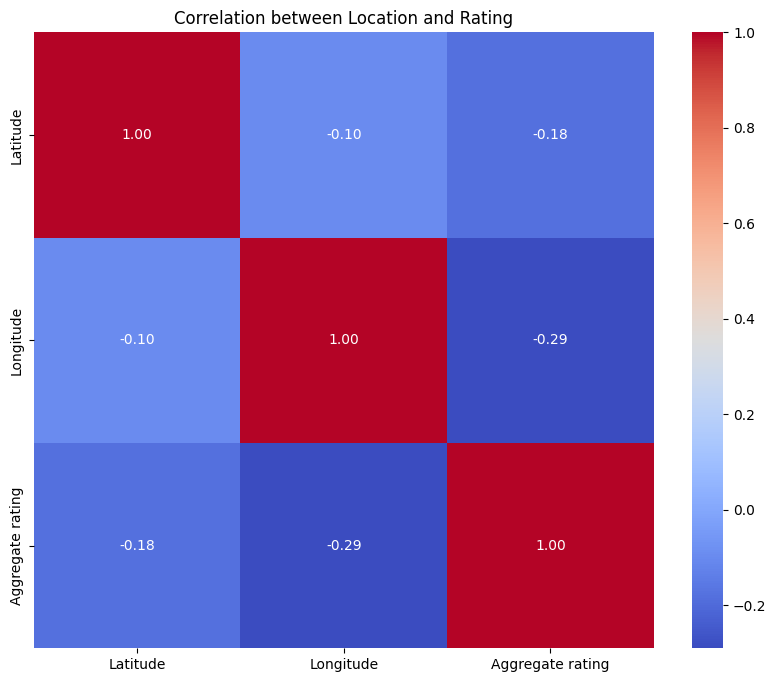

In [29]:
corr_data = df[["Latitude", "Longitude", "Aggregate rating"]]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Location and Rating")
plt.show()

Level 2 and Task 1

Table Booking and Online Delivery

In [31]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),True,False,False,No,3,4.8,Dark Green,Excellent,314


In [32]:
df[df['Has Table booking']==True].value_counts()

,,,,,,,,,,,,,,,,,,,,,count
Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,
53,Amber,1,New Delhi,"N-19, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.220891,28.630197,"North Indian, Chinese, Mughlai",1800,Indian Rupees(Rs.),True,True,False,No,3,2.6,Orange,Average,152,1
6308205,Wildflour Cafe + Bakery,162,Taguig City,"Ground Floor, Netlima Building, 4th Avenue Corner 26th Street, Bonifacio Global City, Taguig City",Bonifacio Global City,"Bonifacio Global City, Taguig City",121.046220,14.549337,"Cafe, Bakery, American, Italian",1500,Botswana Pula(P),True,False,False,No,4,4.4,Green,Very Good,392,1
6315438,NIU by Vikings,162,Taguig City,"Sixth Floor, SM Aura Premier, C5 Road Corner 26th Street, Bonifacio Global City, Taguig City","SM Aura Premier, Bonifacio Global City, Taguig City","SM Aura Premier, Bonifacio Global City, Taguig City, Taguig City",121.053725,14.545858,"Seafood, American, Mediterranean, Japanese",3000,Botswana Pula(P),True,False,False,No,4,4.7,Dark Green,Excellent,535,1
6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),True,False,False,No,3,4.8,Dark Green,Excellent,532,1
6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),True,False,False,No,4,4.8,Dark Green,Excellent,229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670,Shree Rathnam,1,New Delhi,"4, State Bank Nagar, Outer Ring Road, Paschim Vihar, New Delhi",Paschim Vihar,"Paschim Vihar, New Delhi",77.091750,28.660927,"South Indian, North Indian, Chinese",800,Indian Rupees(Rs.),True,True,False,No,2,3.2,Orange,Average,95,1
9671,Shree Rathnam,1,New Delhi,"2 & 3, The India Mall, Community Center, New Friends Colony, New Delhi","The India Mall, New Friends Colony","The India Mall, New Friends Colony, New Delhi",77.268709,28.561656,"South Indian, North Indian, Chinese",800,Indian Rupees(Rs.),True,True,False,No,2,3.5,Yellow,Good,96,1
9706,Amici Cafe,1,New Delhi,"8, Defence Colony Market, Defence Colony, New Delhi",Defence Colony,"Defence Colony, New Delhi",77.230232,28.573554,"Cafe, Italian",1200,Indian Rupees(Rs.),True,True,False,No,3,3.6,Yellow,Good,386,1


In [33]:
1111/7394

0.1502569651068434

percentage of restaurants have table bookings = 15.02%

In [34]:
df[df['Has Online delivery']==True]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
565,5704255,Famous Dave's Barbecue,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382946,24.495693,American,...,Emirati Diram(AED),False,True,False,No,4,4.6,Dark Green,Excellent,376
566,5701978,Pizza Di Rocco,214,Abu Dhabi,Near Corner of Salam and Al Falah Street (9th ...,Al Dhafrah,"Al Dhafrah, Abu Dhabi",54.381931,24.485579,"Italian, Pizza",...,Emirati Diram(AED),True,True,False,No,3,4.4,Green,Very Good,471
571,5700052,Cho Gao - Crowne Plaza Abu Dhabi,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...","Crowne Plaza Abu Dhabi, Al Markaziya","Crowne Plaza Abu Dhabi, Al Markaziya, Abu Dhabi",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",...,Emirati Diram(AED),True,True,False,No,4,4.4,Green,Very Good,246
572,5702418,Gazebo,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...","Dalma Mall, Mussafah Sanaiya","Dalma Mall, Mussafah Sanaiya, Abu Dhabi",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",...,Emirati Diram(AED),True,True,False,No,3,4.0,Green,Very Good,355
573,5700386,Sangeetha Vegetarian Restaurant,214,Abu Dhabi,"Opposite Cristal Hotel, Behind KM Trading, Ele...",Madinat Zayed,"Madinat Zayed, Abu Dhabi",54.363776,24.485253,"Indian, South Indian",...,Emirati Diram(AED),False,True,False,No,2,3.6,Yellow,Good,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,11371,Chili's,1,Pune,"UG 49, Phoenix Market City, Nagar Road, Viman ...","Phoenix Market City, Viman Nagar","Phoenix Market City, Viman Nagar, Pune",73.916619,18.562450,"Mexican, American, Tex-Mex",...,Indian Rupees(Rs.),True,True,False,No,3,4.5,Dark Green,Excellent,1439
9168,18292672,Blue Water,1,Pune,"Punawale, Near Basket Bridge,Off Aundh-Ravet B...",Ravet,"Ravet, Pune",73.751081,18.636215,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),True,True,False,No,3,4.2,Green,Very Good,487
9170,6507967,Tales & Spirits,1,Pune,"Plot 64, Shivaji Housing Society, Senapati Bap...",Senapati Bapat Road,"Senapati Bapat Road, Pune",73.828972,18.530963,"Italian, Continental, Cafe",...,Indian Rupees(Rs.),True,True,False,No,2,4.1,Green,Very Good,997
9171,6506206,18 Degrees Resto Lounge,1,Pune,"8th & 9th Floor, Spot 18 Mall, Pimple Saudagar...","Spot 18 Mall, Pimple Saudagar","Spot 18 Mall, Pimple Saudagar, Pune",73.785901,18.593481,"North Indian, Mediterranean, Chinese",...,Indian Rupees(Rs.),True,True,False,No,4,3.6,Yellow,Good,1566


In [35]:
2355/7394

0.31850148769272385

percentage of restaurants have online delivery = 31.85%

In [36]:
df[df['Has Table booking']==True]['Has Online delivery'].value_counts()

,count
Has Online delivery,
False,678
True,433


In [37]:
df.shape

(7394, 21)

In [38]:
433/7394

0.058560995401677036

percentage of restaurants have table bookings and online delivery both = 5.85%

In [39]:
df[df['Has Table booking']== True]['Aggregate rating'].mean()

3.5875787578757876

In [40]:
df[df['Has Table booking']== False]['Aggregate rating'].mean()

3.4133216616266115

Avg rating of restaurants with table bookings = 3.5875787578757876

Avg rating of restaurants with table bookings = 3.4133216616266115

In [41]:
df[df['Has Online delivery']== True]['Price range'].value_counts()

,count
Price range,
2,1245
1,648
3,409
4,53


Level 2 and Task 2

Price Range Analysis


In [42]:
df['Price range'].value_counts()

,count
Price range,
1,2738
2,2711
3,1370
4,575


In [43]:
# Avg rating for price range 1
df[df['Price range']==1]['Aggregate rating'].mean()

3.2376917457998537

In [44]:
# Avg rating for price range 2
df[df['Price range']==2]['Aggregate rating'].mean()

3.3771670970121725

In [45]:
# Avg rating for price range 3
df[df['Price range']==3]['Aggregate rating'].mean()

3.776715328467153

In [46]:
# Avg rating for price range 1
df[df['Price range']==4]['Aggregate rating'].mean()

3.8909565217391306

In [47]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'Red'], dtype=object)

In [48]:
color = ['Dark Green', 'Green', 'Yellow', 'Orange', 'Red']
for i in color:
  print(i)
  print(df[df['Rating color']==i]['Aggregate rating'].mean())

Dark Green
4.659666666666666
Green
4.167903525046382
Yellow
3.683062977099237
Orange
3.0513390465988213
Red
2.2978494623655914


Dark Green has highest avg rating in all price ranges

In [49]:
color = ['Dark Green', 'Green', 'Yellow', 'Orange', 'Red']
for i in color:
  print(i)
  print(df[(df['Rating color']==i) & (df['Price range']==1)]['Aggregate rating'].mean())

Dark Green
4.667741935483871
Green
4.157638888888889
Yellow
3.6610561056105615
Orange
3.0398944591029027
Red
2.293548387096774


Dark Green has highest avg rating in all price range 1

In [50]:
color = ['Dark Green', 'Green', 'Yellow', 'Orange', 'Red']
for i in color:
  print(i)
  print(df[(df['Rating color']==i) & (df['Price range']==2)]['Aggregate rating'].mean())

Dark Green
4.627536231884057
Green
4.159384615384616
Yellow
3.6711586901763225
Orange
3.0484912280701755
Red
2.3000000000000003


Dark Green has highest avg rating in all price range 2

In [51]:
color = ['Dark Green', 'Green', 'Yellow', 'Orange', 'Red']
for i in color:
  print(i)
  print(df[(df['Rating color']==i) & (df['Price range']==3)]['Aggregate rating'].mean())

Dark Green
4.6460317460317455
Green
4.168674698795181
Yellow
3.715725806451613
Orange
3.0977635782747606
Red
2.305


Dark Green has highest avg rating in all price range 3

In [52]:
color = ['Dark Green', 'Green', 'Yellow', 'Orange', 'Red']
for i in color:
  print(i)
  print(df[(df['Rating color']==i) & (df['Price range']==4)]['Aggregate rating'].mean())

Dark Green
4.70945945945946
Green
4.188144329896907
Yellow
3.716
Orange
3.1623762376237616
Red
2.283333333333333


Dark Green has highest avg rating in all price range 4

Level 2  and  Task 3

Feature Engineering

In [53]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),True,False,False,No,3,4.8,Dark Green,Excellent,314


In [54]:
# Extracting new features
df["Restaurant_name_length"] = df["Restaurant Name"].apply(len)
df["Length_of_Address"] = df["Address"].apply(len)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Has Table booking"] = le.fit_transform(df["Has Table booking"])
df["Has Online delivery"] = le.fit_transform(df["Has Online delivery"])
df["Is delivering now"] = le.fit_transform(df["Is delivering now"])
df["Switch to order menu"] = le.fit_transform(df["Switch to order menu"])


In [57]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_name_length,Length_of_Address
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,0,0,3,4.8,Dark Green,Excellent,314,16,71


Level 3 Task 1

Predictive Modeling

In [ ]:
df.head(1)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["City"] = le.fit_transform(df["City"])
df["Cuisines"] = le.fit_transform(df["Cuisines"])
df["Rating color"] = le.fit_transform(df["Rating color"])
df["Rating text"] = le.fit_transform(df["Rating text"])

In [59]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_name_length,Length_of_Address
0,6317637,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,870,...,0,0,0,3,4.8,0,1,314,16,71


In [62]:
x = df.drop(columns = ["Restaurant ID", "Restaurant Name", "Country Code", "Address", "Locality", "Locality Verbose", "Longitude", "Latitude", "Currency", "Aggregate rating", "Restaurant_name_length","Length_of_Address"])
y = df["Aggregate rating"]

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
model.score(x_test,y_test)

0.5050747267793916